# Dogs Outcomes

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read in Dataset

In [2]:
dogs_outcomes = pd.read_csv('../data/dogs.csv')

#### EDA

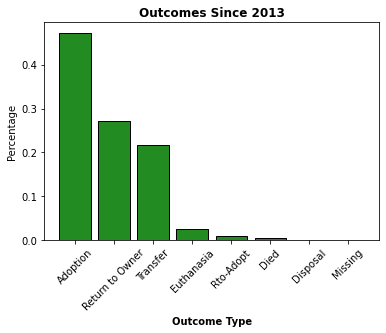

In [63]:
data = dogs_outcomes['outcome_type'].value_counts(normalize=True).reset_index()

plt.bar(data['index'], 
        data['outcome_type'],
        color='forestgreen',
        edgecolor='black'
       )

plt.title('Outcomes Since 2013', weight='bold')
plt.xlabel('Outcome Type', weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.savefig('../plots/outcomes_since_2013', bbox_inches='tight');

In [85]:
outcome_by_breed = pd.crosstab(dogs_outcomes['breed'], 
                    dogs_outcomes['outcome_type'], 
                    margins=True
                   ).reset_index().sort_values('All', ascending=False).head(15)

In [88]:
outcome_by_breed.head()

outcome_type,breed,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer,All
2335,All,33517,253,36,1768,28,19325,571,15405,70903
1773,Pit Bull Mix,3301,22,3,455,12,2834,94,1680,8401
1413,Labrador Retriever Mix,3597,21,1,135,3,1640,44,1434,6875
768,Chihuahua Shorthair Mix,2979,44,1,165,1,1483,31,1526,6230
1158,German Shepherd Mix,1574,9,1,59,1,808,18,549,3019


In [91]:
outcome_by_breed = pd.melt(outcome_by_breed, id_vars=['breed'], value_name='count')

In [94]:
outcome_by_breed

,breed,outcome_type,count
0,All,Adoption,33517
1,Pit Bull Mix,Adoption,3301
2,Labrador Retriever Mix,Adoption,3597
3,Chihuahua Shorthair Mix,Adoption,2979
4,German Shepherd Mix,Adoption,1574
...,...,...,...
130,Boxer Mix,All,961
131,Border Collie Mix,All,951
132,German Shepherd,All,917
133,Miniature Poodle Mix,All,858


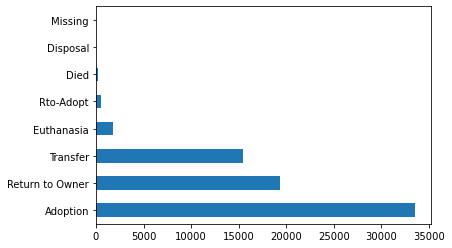

In [4]:
dogs_outcomes['outcome_type'].value_counts().plot(kind='barh')

In [5]:
dogs_outcomes.groupby(['outcome_type', 'outcome_subtype'])['animal_id'].count()

outcome_type     outcome_subtype    
Adoption         Foster                  4680
                 Offsite                  314
Died             At Vet                    28
                 Enroute                    7
                 In Foster                 40
                 In Kennel                158
                 In Surgery                10
Euthanasia       Aggressive               525
                 At Vet                    53
                 Behavior                 149
                 Court/Investigation       31
                 Medical                   69
                 Rabies Risk               94
                 Suffering                839
Missing          In Foster                  5
                 In Kennel                  2
                 Possible Theft            14
Return to Owner  At Vet                     1
                 Customer S                 5
                 Field                     39
                 Foster                    

In [6]:
dogs_outcomes['intake_sex'].value_counts(normalize=True)

Male       0.535168
Female     0.458825
Unknown    0.006007
Name: intake_sex, dtype: float64

Matches the intakes data

In [7]:
dogs_outcomes['outcome_spay_neuter'].value_counts(normalize=True)

Neutered    0.418368
Spayed      0.357169
Intact      0.218456
Unknown     0.006007
Name: outcome_spay_neuter, dtype: float64

63% of dogs are intact when they are brought into the shelter. This confirms that the shelter is actively spaying/neutering the animals

#### Adoptions

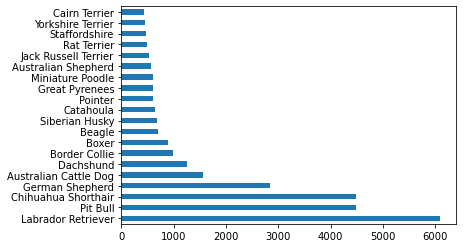

In [8]:
adopted = dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption'][['breed_1', 'breed_2']]

pd.concat([adopted['breed_1'], adopted['breed_2']]).value_counts().head(20).plot(kind='barh')

##### Age Distribution of Adopted Dogs

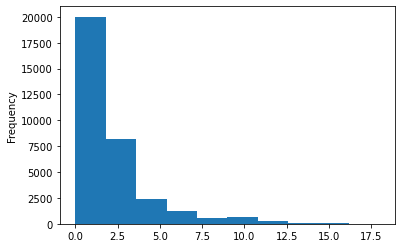

In [9]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption']['outcome_age_in_years'].plot(kind='hist');

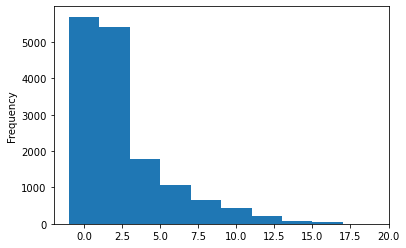

In [10]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Transfer']['outcome_age_in_years'].plot(kind='hist');

In [11]:
dogs_outcomes.head()

,animal_id,intake_datetime,name,intake_type,intake_condition,animal_type,intake_sex,intake_spay_neuter,intake_age_in_years,breed,...,color_1,color_2,found_address,found_city,datetime_outcomes,outcome_type,outcome_subtype,outcome_sex,outcome_spay_neuter,outcome_age_in_years
0,A521520,2013-10-01 07:51:00,Nina,Stray,Normal,Dog,Female,Spayed,7.0,Border Terrier/Border Collie,...,White,Tan,NaN,Austin (TX),2013-10-01 15:39:00,Return to Owner,NaN,Female,Spayed,7.0
1,A664233,2013-10-01 08:53:00,Stevie,Stray,Injured,Dog,Female,Intact,3.0,Pit Bull Mix,...,Blue,White,7405 Springtime,Austin (TX),2013-10-01 15:33:00,Euthanasia,Suffering,Female,Intact,3.0
2,A664234,2013-10-01 10:37:00,NaN,Stray,Injured,Dog,Male,Intact,8.0,Border Collie Mix,...,Black,White,5400 Jimmy Clay,Austin (TX),2013-10-01 19:09:00,Euthanasia,Suffering,Male,Intact,8.0
3,A664257,2013-10-01 11:01:00,Pippin,Stray,Normal,Dog,Female,Intact,4.0,Podengo Pequeno Mix,...,Black,NaN,NaN,Travis (TX),2013-10-24 13:31:00,Adoption,Foster,Female,Spayed,4.0
4,A664266,2013-10-01 11:09:00,NaN,Stray,Normal,Dog,Female,Intact,1.0,Chihuahua Shorthair Mix,...,Buff,NaN,NaN,Austin (TX),2013-10-05 15:06:00,Transfer,Partner,Female,Intact,1.0


In [12]:
dogs_outcomes[dogs_outcomes['outcome_type'] == 'Adoption'][['breed_1', 'breed_2']]

,breed_1,breed_2
3,Podengo Pequeno,NaN
7,Chinese Sharpei,Labrador Retriever
9,Great Pyrenees,NaN
12,Chihuahua Shorthair,Dachshund
15,Siberian Husky,NaN
...,...,...
70891,Border Terrier,NaN
70892,Border Terrier,NaN
70895,German Shepherd,Great Pyrenees
70906,Labrador Retriever,NaN


In [13]:
adopted_breeds = pd.concat([adopted['breed_1'], adopted['breed_2']]).value_counts().reset_index()

intake_breeds = pd.concat([dogs_outcomes['breed_1'], dogs_outcomes['breed_2']]).value_counts().reset_index()

In [14]:
adopted_breeds = adopted_breeds.rename(columns={'index': 'breed', 0:'adoption_count'})
intake_breeds  = intake_breeds.rename(columns={'index': 'breed', 0:'intake_count'})

In [15]:
adopted_breeds.head()

,breed,adoption_count
0,Labrador Retriever,6091
1,Pit Bull,4488
2,Chihuahua Shorthair,4480
3,German Shepherd,2839
4,Australian Cattle Dog,1561


In [16]:
intake_breeds.head()

,breed,intake_count
0,Labrador Retriever,11656
1,Pit Bull,11258
2,Chihuahua Shorthair,9122
3,German Shepherd,5437
4,Australian Cattle Dog,2739


In [17]:
adoption_rate = intake_breeds.merge(adopted_breeds, on='breed')

adoption_rate['adoption_rate'] = round((adoption_rate['adoption_count'] / adoption_rate['intake_count']) * 100, 2)

In [18]:
adoption_rate.sort_values('intake_count', ascending=False).head(10)

,breed,intake_count,adoption_count,adoption_rate
0,Labrador Retriever,11656,6091,52.26
1,Pit Bull,11258,4488,39.86
2,Chihuahua Shorthair,9122,4480,49.11
3,German Shepherd,5437,2839,52.22
4,Australian Cattle Dog,2739,1561,56.99
5,Dachshund,2371,1259,53.10
6,Boxer,1837,896,48.78
7,Border Collie,1771,999,56.41
8,Miniature Poodle,1568,599,38.20
9,Siberian Husky,1445,692,47.89


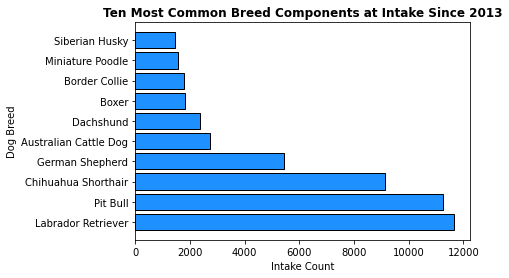

In [19]:
data = adoption_rate.sort_values('intake_count', ascending=False).head(10)

plt.barh(data['breed'], 
         data['intake_count'],
         color='dodgerblue',
         edgecolor='black',
        )

plt.title('Ten Most Common Breed Components at Intake Since 2013', weight='bold')
plt.xlabel('Intake Count')
plt.ylabel('Dog Breed');

In [20]:
adoption_rate['intake_count'].describe()

count      198.000000
mean       416.732323
std       1399.437408
min          1.000000
25%         15.000000
50%         63.500000
75%        262.750000
max      11656.000000
Name: intake_count, dtype: float64

In [21]:
adoption_rate[adoption_rate['intake_count'] > 63].sort_values('adoption_rate').head(15)

,breed,intake_count,adoption_count,adoption_rate
24,Shih Tzu,725,99,13.66
48,Lhasa Apso,274,44,16.06
61,Pekingese,176,35,19.89
44,Pomeranian,288,71,24.65
46,Boston Terrier,287,72,25.09
78,Standard Poodle,107,28,26.17
71,Bichon Frise,124,34,27.42
41,Cocker Spaniel,347,96,27.67
30,Pug,538,154,28.62
79,West Highland,106,31,29.25


In [22]:
dogs_outcomes[
    (dogs_outcomes['breed_1'] == 'Shih Tzu') | (dogs_outcomes['breed_2'] == 'Shih Tzu')
]['outcome_type'].value_counts()

Transfer           355
Return to Owner    254
Adoption            99
Euthanasia          14
Rto-Adopt            2
Died                 1
Name: outcome_type, dtype: int64

In [23]:
dogs_outcomes[['breed_1', 'breed_2', 'mix_flag']]

,breed_1,breed_2,mix_flag
0,Border Collie,Border Terrier,True
1,Pit Bull,NaN,True
2,Border Collie,NaN,True
3,Podengo Pequeno,NaN,True
4,Chihuahua Shorthair,NaN,True
...,...,...,...
70912,German Shepherd,NaN,True
70913,Pit Bull,NaN,True
70914,Collie Smooth,NaN,False
70915,Labrador Retriever,NaN,False


In [24]:
# filling the null values so I can combine strings from the breed columns
dogs_outcomes['breed_2'] = dogs_outcomes['breed_2'].fillna('_')

In [25]:
dogs_outcomes['full_breed'] = dogs_outcomes['breed_1'] + '/' + dogs_outcomes['breed_2'] + ' ' + dogs_outcomes['mix_flag'].astype('str')

In [26]:
dogs_outcomes['full_breed'] = dogs_outcomes['full_breed'].str.replace('True', 'Mix')

In [29]:
dogs_outcomes['full_breed'] = dogs_outcomes['full_breed'].str.replace('/_', '')

In [32]:
dogs_outcomes['full_breed'] = dogs_outcomes['full_breed'].str.replace(' False', '')

In [34]:
dogs_outcomes['full_breed'].value_counts().head(25)

Pit Bull Mix                         8402
Labrador Retriever Mix               6876
Chihuahua Shorthair Mix              6231
German Shepherd Mix                  3019
Australian Cattle Dog Mix            1512
Pit Bull                             1365
Labrador Retriever                   1087
Chihuahua Shorthair                  1071
Dachshund Mix                        1044
Boxer Mix                             961
Border Collie Mix                     951
German Shepherd                       918
Miniature Poodle Mix                  859
Catahoula Mix                         704
Siberian Husky Mix                    700
Australian Shepherd Mix               695
Staffordshire Mix                     683
Chihuahua Shorthair/Dachshund Mix     636
Rat Terrier Mix                       635
Yorkshire Terrier Mix                 615
Beagle Mix                            585
Miniature Schnauzer Mix               580
Labrador Retriever/Pit Bull Mix       579
Great Pyrenees Mix                

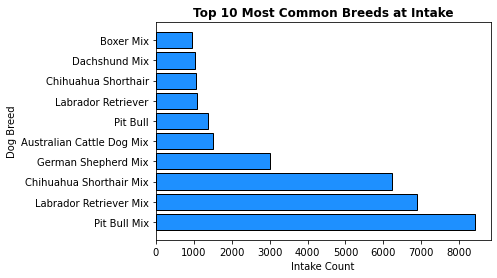

In [35]:
data = dogs_outcomes['full_breed'].value_counts().reset_index().rename(columns={'index':'full_breed', 'full_breed':'count'}).head(10)

plt.barh(data['full_breed'], 
         data['count'],
         color='dodgerblue',
         edgecolor='black'
)

plt.title('Top 10 Most Common Breeds at Intake', weight='bold')
plt.xlabel('Intake Count')
plt.ylabel('Dog Breed');

In [43]:
# rename animal id column to count--
#need to plot stacked bar chart for highest/lowest percentages of adoption, transfer, RTO and euthanized
dogs_outcomes.groupby(['full_breed', 'outcome_type'])['animal_id'].count().reset_index()

,full_breed,outcome_type,animal_id
0,Affenpinscher,Adoption,1
1,Affenpinscher Mix,Adoption,4
2,Affenpinscher Mix,Return to Owner,3
3,Affenpinscher/Border Terrier Mix,Adoption,1
4,Affenpinscher/Bruss Griffon Mix,Transfer,1
...,...,...,...
3812,Yorkshire Terrier Mix,Euthanasia,16
3813,Yorkshire Terrier Mix,Return to Owner,201
3814,Yorkshire Terrier Mix,Rto-Adopt,1
3815,Yorkshire Terrier Mix,Transfer,153


In [36]:
np.where(dogs_outcomes['breed_1'] == dogs_outcomes['breed_2'])

(array([ 2648,  3181,  3771,  5343,  8755,  9392, 10061, 11117, 15854,
        15875, 18511, 18947, 21098, 21547, 27594, 28763, 34214, 34869,
        35017, 35619, 36817, 49720, 52739, 57180, 57608, 59461, 60345,
        65259, 68955, 69643]),)

In [42]:
dogs_outcomes.iloc[8755]

animal_id                                                         A684804
intake_datetime                                       2014-07-28 18:46:00
name                                                              Diamond
intake_type                                                         Stray
intake_condition                                                   Normal
animal_type                                                           Dog
intake_sex                                                         Female
intake_spay_neuter                                                 Intact
intake_age_in_years                                                  0.75
breed                   American Pit Bull Terrier/American Pit Bull Te...
breed_1                                         American Pit Bull Terrier
breed_2                                         American Pit Bull Terrier
mix_flag                                                             True
color                                 